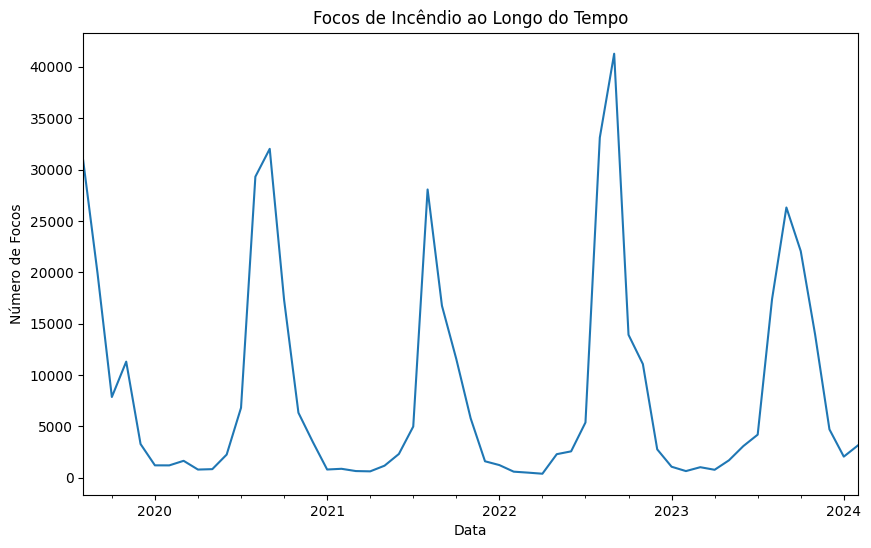

ADF Statistic: -1.575206031091852
p-value: 0.4960352218360691


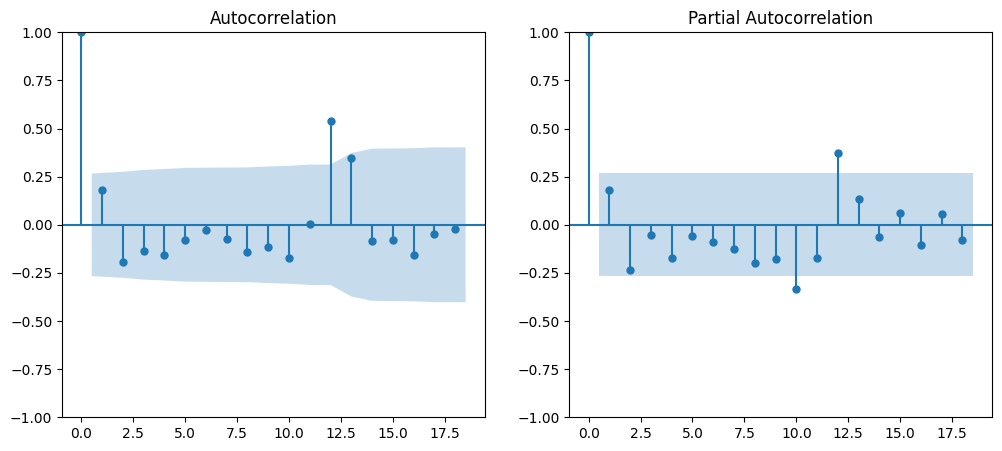

c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                              focuses   No. Observations:                   55
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -419.796
Date:                              Sun, 10 Mar 2024   AIC                            847.593
Time:                                      02:19:10   BIC                            854.543
Sample:                                  08-01-2019   HQIC                           850.140
                                       - 02-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1157      0.120     -0.963      0.335      -0.351       0.120
ar.S.L12      -0.61

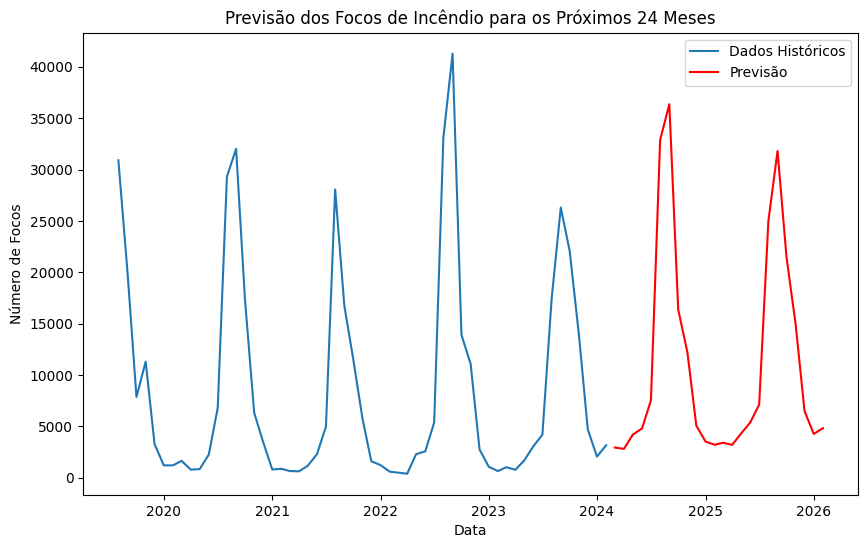

In [2]:
# Importações necessárias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Carregar os dados
file_path = 'C:\\Users\\Felipe\\Downloads\\dashboard-fires-month-09-03-2024-17_33_05.csv'  # Atualize com o caminho correto
df = pd.read_csv(file_path, delimiter=';')
df['date'] = pd.to_datetime(df['date'], format='%Y/%m')
df.set_index('date', inplace=True)
df_sum = df.groupby('date')['focuses'].sum()

# Análise exploratória e visualização
plt.figure(figsize=(10, 6))
df_sum.plot(title='Focos de Incêndio ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Focos')
plt.show()

# Teste de estacionariedade
adf_result = adfuller(df_sum)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Diferenciação e plots ACF e PACF
df_diff = df_sum.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_diff, ax=ax1)
plot_pacf(df_diff, ax=ax2)
plt.show()

# Configuração e ajuste do modelo SARIMA
model = SARIMAX(df_sum, order=(1, 1, 0), seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

# Projeção para os próximos 24 meses
forecast = results.get_forecast(steps=24)
forecast_index = pd.date_range(df_sum.index[-1], periods=25, freq='MS')[1:]

# Plotar projeção
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
plt.figure(figsize=(10, 6))
plt.plot(df_sum, label='Dados Históricos')
plt.plot(forecast_series, label='Previsão', color='red')
plt.title('Previsão dos Focos de Incêndio para os Próximos 24 Meses')
plt.xlabel('Data')
plt.ylabel('Número de Focos')
plt.legend()
plt.show()
